## **Loading dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/data

[Errno 2] No such file or directory: 'drive/MyDrive/data'
/content/drive/MyDrive/data


In [ ]:
ls

 athlete_events.csv           lda_10_iter.pkl    tennis/
'BBC News Train.csv'          ML_Project_1.zip   titanic_train.csv
 Dig-MNIST.csv                MNIST/             twitter/
 groceries.csv                pokemon.csv        vgsales.csv
'groceries - groceries.csv'   project1.csv       wineQualityReds.csv
 housing.csv                  Sentiment/         wineQualityWhites.csv


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt  
import seaborn as sns

In [ ]:
data=pd.read_csv('project1.csv')
data.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


## **Data Preprocessing**

In [ ]:
data.shape

(13299, 18)

In [ ]:
data.describe()

,APP_ID,CIBIL_SCORE_VALUE,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
count,13299.0000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000
mean,25643.0000,1.037898,0.908640,0.658922,32.473870,1.536281,0.590044,0.485149,0.427175,2.340778,0.833371,74.508760,0.751259,0.776054,24.792240,0.377171
std,7678.4699,0.865391,0.288132,0.474089,8.804317,0.971671,0.491844,0.499798,0.727715,1.341674,0.553415,72.971951,0.938441,0.126130,7.501085,0.484697
min,12345.0000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.007508,12.000000,0.000000
25%,18994.0000,0.000000,1.000000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.719710,18.000000,0.000000
50%,25643.0000,1.000000,1.000000,1.000000,31.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,48.000000,0.000000,0.807537,24.000000,0.000000
75%,32292.0000,2.000000,1.000000,1.000000,38.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,100.000000,1.000000,0.849177,36.000000,1.000000
max,38941.0000,2.000000,1.000000,1.000000,55.000000,3.000000,1.000000,1.000000,2.000000,4.000000,2.000000,398.000000,3.000000,1.000000,36.000000,1.000000


There is no missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13299 entries, 0 to 13298
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APP_ID               13299 non-null  int64  
 1    CIBIL_SCORE_VALUE   13299 non-null  int64  
 2   NEW_CUST             13299 non-null  object 
 3   CUS_CATGCODE         13299 non-null  int64  
 4    EMPLOYMENT_TYPE     13299 non-null  int64  
 5   AGE                  13299 non-null  int64  
 6    SEX                 13299 non-null  object 
 7    NO_OF_DEPENDENTS    13299 non-null  int64  
 8    MARITAL             13299 non-null  int64  
 9    EDU_QUA             13299 non-null  int64  
 10    P_RESTYPE          13299 non-null  int64  
 11   P_CATEGORY          13299 non-null  int64  
 12   EMPLOYEE_TYPE       13299 non-null  int64  
 13    MON_IN_OCC         13299 non-null  int64  
 14   INCOM_EXP_GMI       13299 non-null  int64  
 15  LTV                  13299 non-null 

Categorical data like CUS_CATGCODE,SEX need to be converted

In [ ]:
dfNewCustDummies = pd.get_dummies(data['NEW_CUST'], prefix = 'NEW_CUST')
dfSexDummies = pd.get_dummies(data[' SEX  '], prefix = 'sex')
data = pd.concat([data, dfNewCustDummies], axis=1)
data = pd.concat([data, dfSexDummies], axis=1)
data.drop(' SEX  ', inplace=True, axis=1)
data.drop('NEW_CUST', inplace=True, axis=1)

## **Exploratory data analysis**

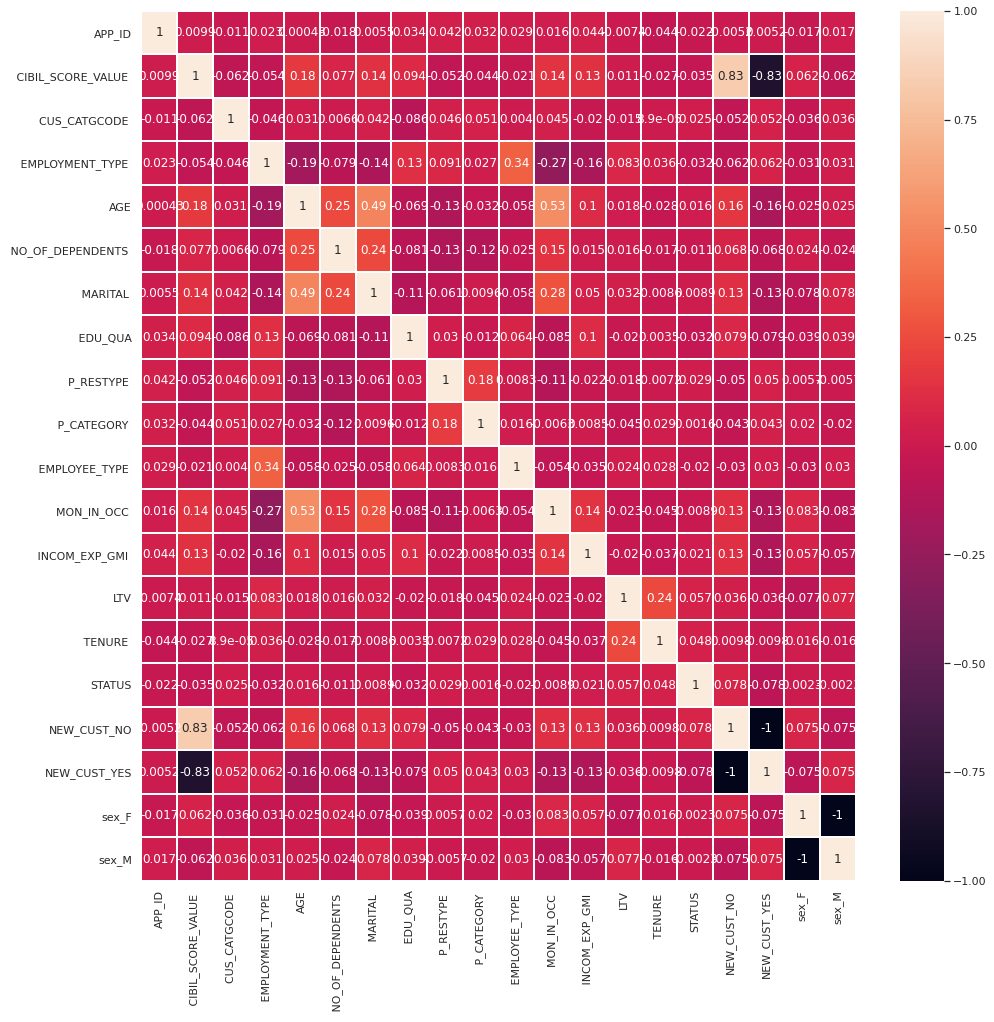

In [ ]:
sns.set(rc={'figure.figsize':(16,16)})
ax=sns.heatmap(data.corr(),annot=True,linewidths=1)

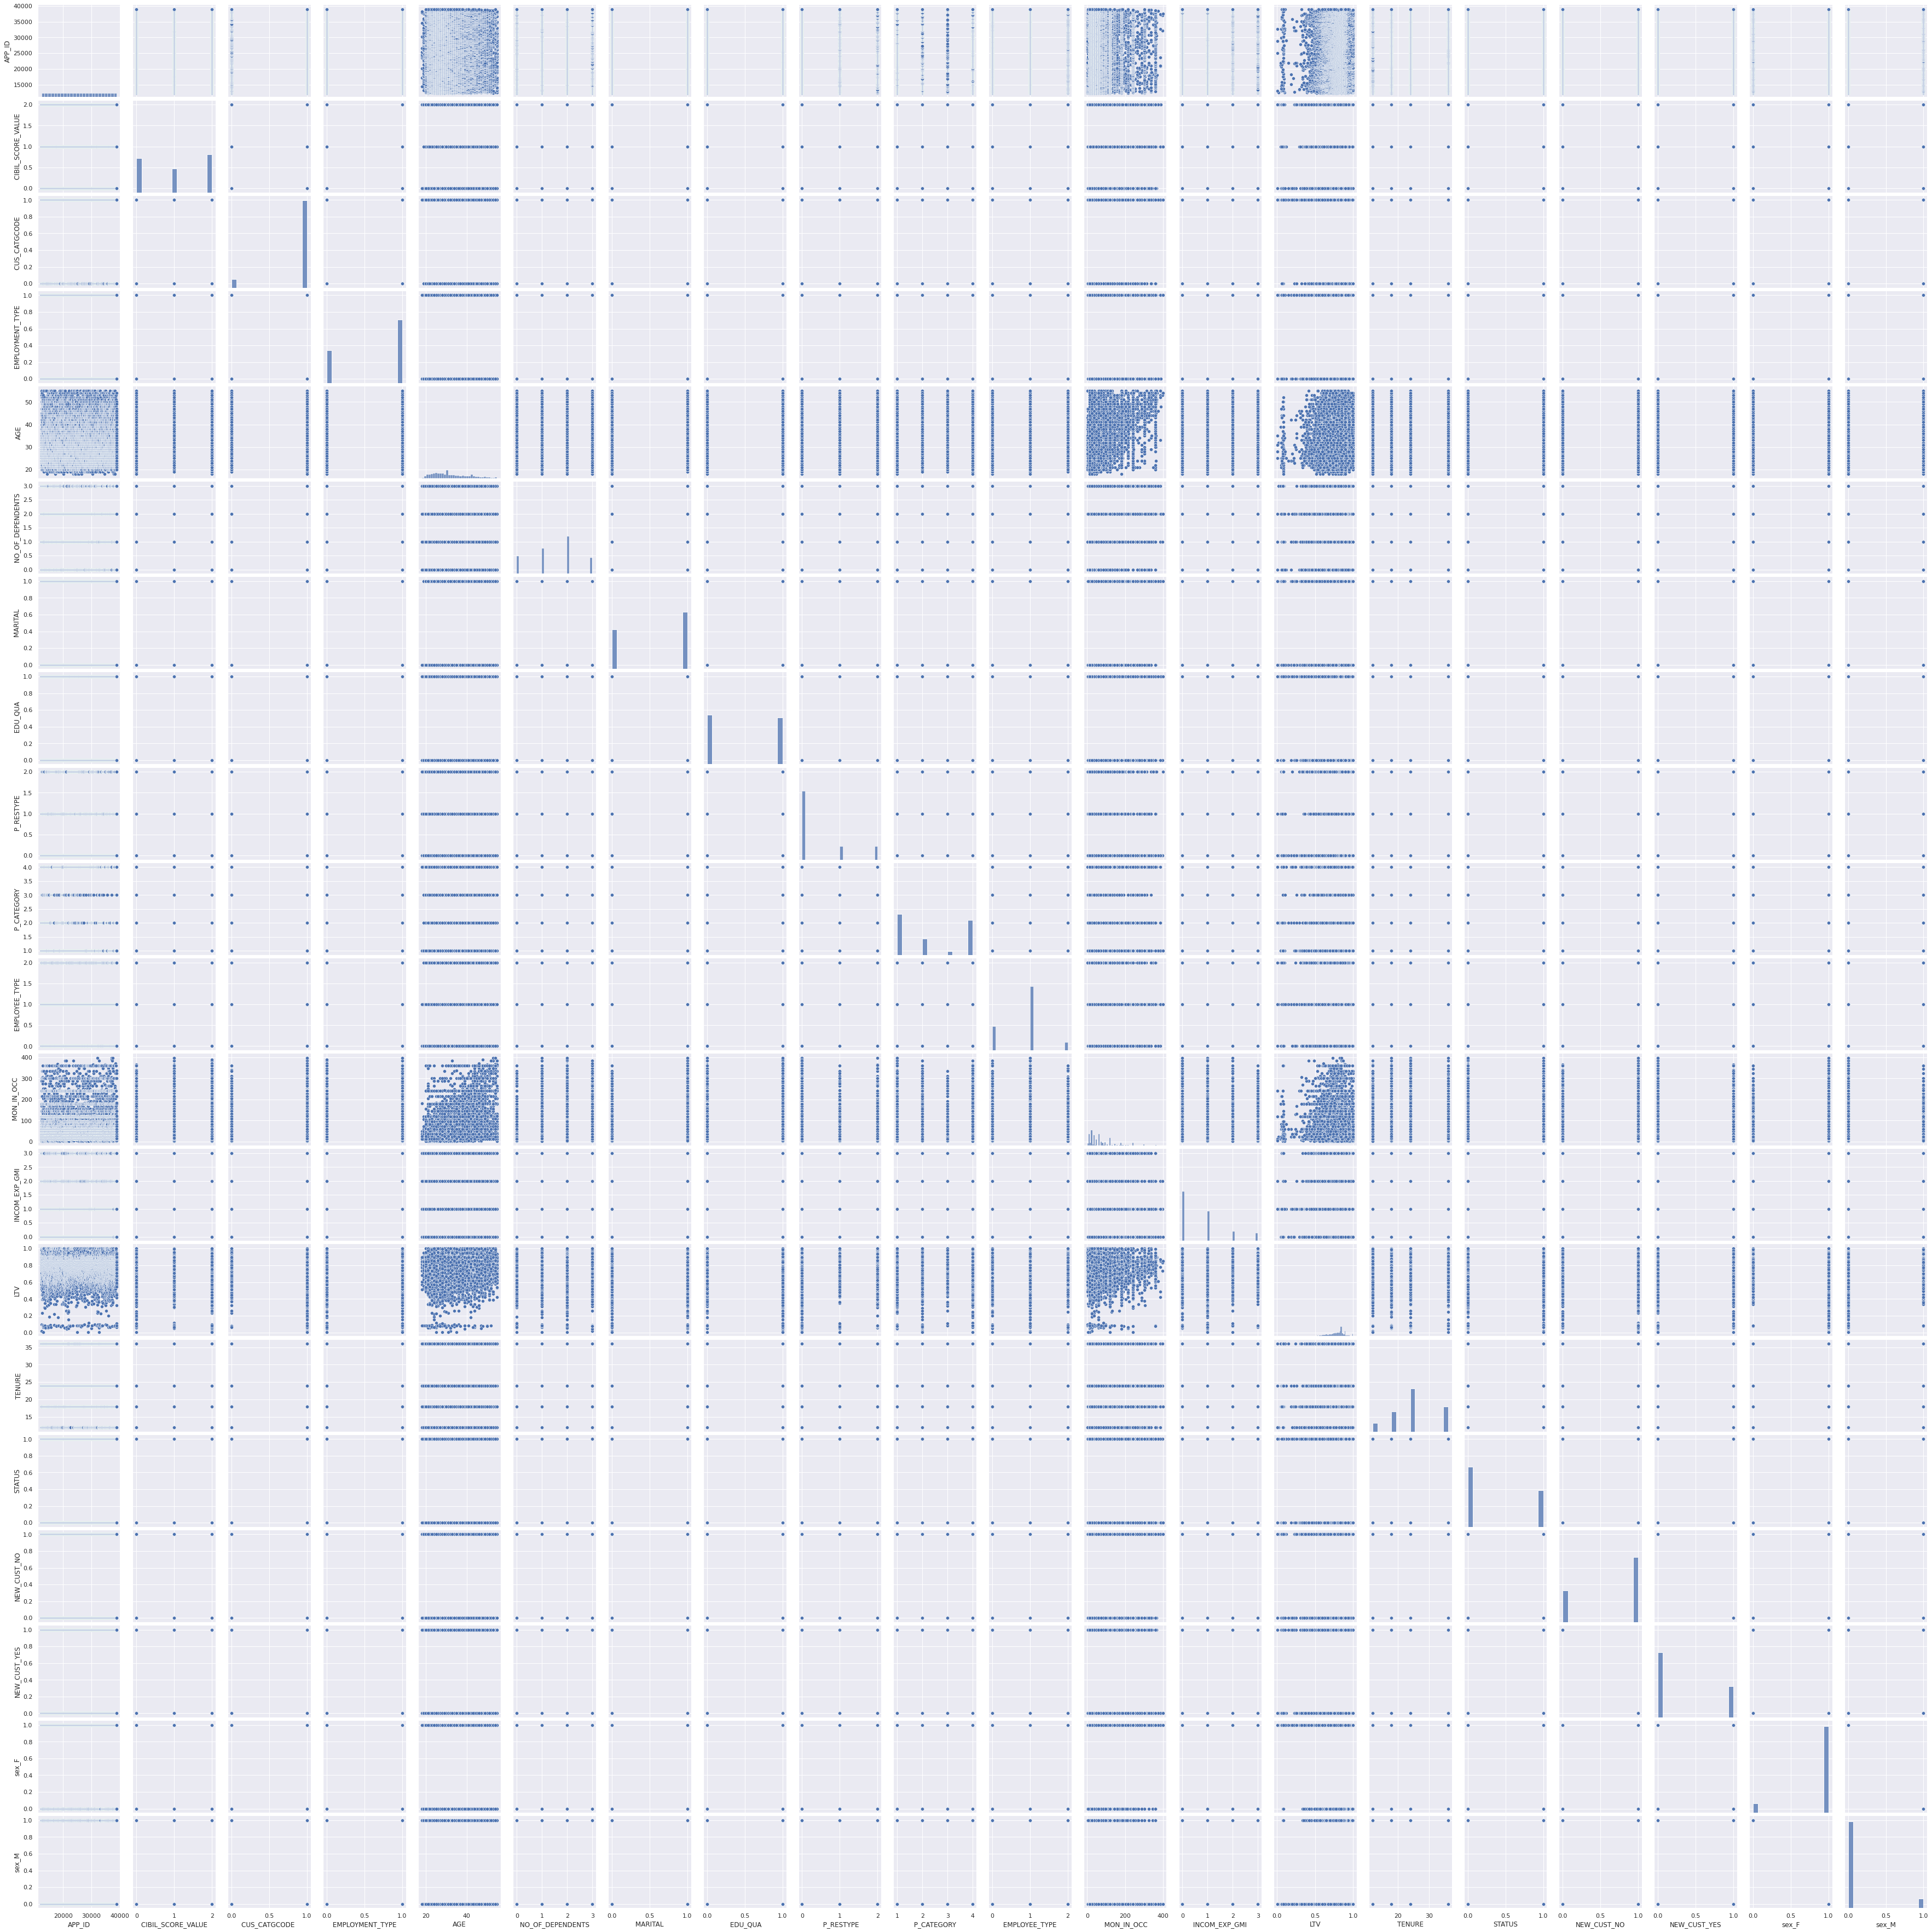

In [ ]:
sns.pairplot(data)

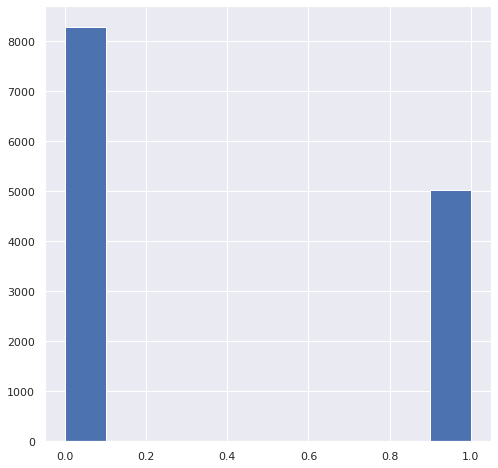

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
data['STATUS'].hist()

Clearly,this is an imbalanced dataset

## **Method 1: Undersampling**

In [ ]:
# Class count
count_class_0, count_class_1 = data.STATUS.value_counts()
 
# Divide by class
df_class_0 = data[data['STATUS'] == 0]
df_class_1 = data[data['STATUS'] == 1]

In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.STATUS.value_counts())

Random under-sampling:
1    5016
0    5016
Name: STATUS, dtype: int64


In [ ]:
X = df_test_under.drop('STATUS',axis='columns')
y = df_test_under['STATUS']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

### **KNeighbors Classifier**

In [ ]:
param_grid = [{
 'n_neighbors':list(range(1,21,2)),
 'weights':['uniform','distance'],
 'metric':['euclidean','manhattan','minkowski']
 }]

In [ ]:
 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
Best cross-validation score: 0.52
Test set score: 0.51


In [ ]:
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

[[497 507]
 [472 531]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.50      0.50      1004
           1       0.51      0.53      0.52      1003

    accuracy                           0.51      2007
   macro avg       0.51      0.51      0.51      2007
weighted avg       0.51      0.51      0.51      2007



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
param_grid = [{
 'n_neighbors':list(range(1,21,2)),
 'weights':['uniform','distance'],
 'metric':['euclidean','manhattan','minkowski']
 }]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
Best cross-validation score: 0.52
Test set score: 0.51


In [ ]:
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

[[497 507]
 [472 531]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.50      0.50      1004
           1       0.51      0.53      0.52      1003

    accuracy                           0.51      2007
   macro avg       0.51      0.51      0.51      2007
weighted avg       0.51      0.51      0.51      2007



This seems to reduce the false positive error but is not recommended as it leaves a part of data unused 

# **Method2: Oversampling**

In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
 
print('Random over-sampling:')
print(df_test_over.STATUS.value_counts())

Random over-sampling:
1    8283
0    8283
Name: STATUS, dtype: int64


In [ ]:
X = df_test_over.drop('STATUS',axis='columns')
y = df_test_over['STATUS']
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    6626
0    6626
Name: STATUS, dtype: int64

### **KNeighborsClassifier**

In [ ]:
param_grid = [{
 'n_neighbors':list(range(1,21,2)),
 'weights':['uniform','distance'],
 'metric':['euclidean','manhattan','minkowski']
 }]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.71
Test set score: 0.74


In [ ]:
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

[[1086  571]
 [ 284 1373]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.66      0.72      1657
           1       0.71      0.83      0.76      1657

    accuracy                           0.74      3314
   macro avg       0.75      0.74      0.74      3314
weighted avg       0.75      0.74      0.74      3314



### **LogisticRegression**

In [ ]:
param_grid = [{
 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
 }]

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
grid_search = GridSearchCV(LogisticRegression(max_iter=14000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'C': 10}
Best cross-validation score: 0.54
Test set score: 0.56


In [ ]:
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

[[968 689]
 [763 894]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.58      0.57      1657
           1       0.56      0.54      0.55      1657

    accuracy                           0.56      3314
   macro avg       0.56      0.56      0.56      3314
weighted avg       0.56      0.56      0.56      3314



### **RidgeClassifier**

In [ ]:
param_grid = [{
 'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 }]

In [ ]:
from sklearn.linear_model import RidgeClassifier
grid_search = GridSearchCV(RidgeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.61
Test set score: 0.61


In [ ]:
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

[[1258  399]
 [ 905  752]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.76      0.66      1657
           1       0.65      0.45      0.54      1657

    accuracy                           0.61      3314
   macro avg       0.62      0.61      0.60      3314
weighted avg       0.62      0.61      0.60      3314



### **SVC (Support Vector Classifier)**

In [ ]:
param_grid = [{
 'kernel':['poly', 'rbf', 'sigmoid'],
 'C':[50, 10, 1.0, 0.1, 0.01],
 'gamma':['scale']
 }]
 
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation score: 0.52
Test set score: 0.52


In [ ]:
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

[[ 511 1146]
 [ 461 1196]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.31      0.39      1657
           1       0.51      0.72      0.60      1657

    accuracy                           0.52      3314
   macro avg       0.52      0.52      0.49      3314
weighted avg       0.52      0.52      0.49      3314



### **RandomForestClassifier**

In [ ]:
param_grid = [{
 'n_estimators':[10, 100, 1000],
 'max_features':['sqrt', 'log2']
 }]
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'max_features': 'log2', 'n_estimators': 1000}
Best cross-validation score: 0.80
Test set score: 0.83
[[1356  301]
 [ 261 1396]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1657
           1       0.82      0.84      0.83      1657

    accuracy                           0.83      3314
   macro avg       0.83      0.83      0.83      3314
weighted avg       0.83      0.83      0.83      3314



### **GradientBoostingClassifier**

In [ ]:
param_grid=[
            {
                'n_estimators': [10, 100, 1000],
                 'learning_rate' : [0.001, 0.01, 0.1],
                  'subsample' : [0.5, 0.7, 1.0],
                 'max_depth' : [3, 7, 9]
            }
]
from sklearn.ensemble import GradientBoostingClassifier
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}
Best cross-validation score: 0.78
Test set score: 0.82
[[1346  311]
 [ 294 1363]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1657
           1       0.81      0.82      0.82      1657

    accuracy                           0.82      3314
   macro avg       0.82      0.82      0.82      3314
weighted avg       0.82      0.82      0.82      3314



### **BaggingClassifier**

In [ ]:
param_grid=[
            {
                'n_estimators': [10, 100, 1000]
            }
]
from sklearn.ensemble import BaggingClassifier
grid_search = GridSearchCV(BaggingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'n_estimators': 1000}
Best cross-validation score: 0.78
Test set score: 0.82
[[1330  327]
 [ 265 1392]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1657
           1       0.81      0.84      0.82      1657

    accuracy                           0.82      3314
   macro avg       0.82      0.82      0.82      3314
weighted avg       0.82      0.82      0.82      3314



Scaling the data to train better

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
param_grid = [{
 'n_neighbors':list(range(1,21,2)),
 'weights':['uniform','distance']
 }]

In [ ]:
 
 
from sklearn.model_selection import GridSearchCV
 
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.71
Test set score: 0.76


In [ ]:
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

[[1093  564]
 [ 234 1423]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.66      0.73      1657
           1       0.72      0.86      0.78      1657

    accuracy                           0.76      3314
   macro avg       0.77      0.76      0.76      3314
weighted avg       0.77      0.76      0.76      3314



In [ ]:
param_grid = [{
 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
 }]
 
from sklearn.model_selection import GridSearchCV
 
from sklearn.linear_model import LogisticRegression
grid_search = GridSearchCV(LogisticRegression(max_iter=14000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'C': 0.1}
Best cross-validation score: 0.61
Test set score: 0.62
[[1255  402]
 [ 862  795]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.76      0.67      1657
           1       0.66      0.48      0.56      1657

    accuracy                           0.62      3314
   macro avg       0.63      0.62      0.61      3314
weighted avg       0.63      0.62      0.61      3314



In [ ]:
param_grid = [{
 'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 }]
from sklearn.linear_model import RidgeClassifier
grid_search = GridSearchCV(RidgeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.60
Test set score: 0.61
[[1657    0]
 [1657    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1657
           1       0.00      0.00      0.00      1657

    accuracy                           0.50      3314
   macro avg       0.25      0.50      0.33      3314
weighted avg       0.25      0.50      0.33      3314



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_grid = [{
 'kernel':['poly', 'rbf', 'sigmoid'],
 'C':[50, 10, 1.0, 0.1, 0.01],
 'gamma':['scale']
 }]
 
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
 
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.69
Test set score: 0.71
[[1115  542]
 [ 433 1224]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.67      0.70      1657
           1       0.69      0.74      0.72      1657

    accuracy                           0.71      3314
   macro avg       0.71      0.71      0.71      3314
weighted avg       0.71      0.71      0.71      3314



In [ ]:
param_grid = [{
 'n_estimators':[10, 100, 1000],
 'max_features':['sqrt', 'log2']
 }]
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

In [ ]:
param_grid=[
            {
                'n_estimators': [10, 100, 1000],
                 'learning_rate' : [0.001, 0.01, 0.1],
                  'subsample' : [0.5, 0.7, 1.0]
            }
]
from sklearn.ensemble import GradientBoostingClassifier
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

In [ ]:
param_grid=[
            {
                'n_estimators': [10, 100, 1000]
            }
]
from sklearn.ensemble import BaggingClassifier
grid_search = GridSearchCV(BaggingClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

# **Method3: SMOTE**

In [ ]:
pip install imbalanced-learn

In [ ]:
X = data.drop('STATUS',axis='columns')
y = data['STATUS']

In [ ]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)
 
unique, counts = np.unique(y_sm, return_counts=True)
print(unique,counts)

[0 1] [8283 8283]


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
param_grid = [{
 'n_neighbors':list(range(1,21,2)),
 'weights':['uniform','distance'],
 'metric':['euclidean','manhattan','minkowski']
 }]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.65
Test set score: 0.67


In [ ]:
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

[[ 980  677]
 [ 416 1241]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.59      0.64      1657
           1       0.65      0.75      0.69      1657

    accuracy                           0.67      3314
   macro avg       0.67      0.67      0.67      3314
weighted avg       0.67      0.67      0.67      3314



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### **KNeighborsClassifier**

In [ ]:
param_grid = [{
 'n_neighbors':list(range(1,21,2)),
 'weights':['uniform','distance'],
 'metric':['euclidean','manhattan','minkowski']
 }]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best cross-validation score: 0.67
Test set score: 0.69


In [ ]:
pred=grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

[[ 152 1505]
 [ 117 1540]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.09      0.16      1657
           1       0.51      0.93      0.66      1657

    accuracy                           0.51      3314
   macro avg       0.54      0.51      0.41      3314
weighted avg       0.54      0.51      0.41      3314



### **LogisticRegression**

In [ ]:
param_grid = [{
 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
 }]
 
from sklearn.model_selection import GridSearchCV
 
from sklearn.linear_model import LogisticRegression
grid_search = GridSearchCV(LogisticRegression(max_iter=14000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'C': 1}
Best cross-validation score: 0.63
Test set score: 0.63
[[1275  382]
 [ 831  826]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.77      0.68      1657
           1       0.68      0.50      0.58      1657

    accuracy                           0.63      3314
   macro avg       0.64      0.63      0.63      3314
weighted avg       0.64      0.63      0.63      3314



### **RidgeClassifier**

In [ ]:
param_grid = [{
 'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 }]
from sklearn.linear_model import RidgeClassifier
grid_search = GridSearchCV(RidgeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.63
Test set score: 0.63
[[1277  380]
 [ 838  819]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.77      0.68      1657
           1       0.68      0.49      0.57      1657

    accuracy                           0.63      3314
   macro avg       0.64      0.63      0.63      3314
weighted avg       0.64      0.63      0.63      3314



### **SVC(Support Vector Classifier)**

In [ ]:
param_grid = [{
 'kernel':['poly', 'rbf', 'sigmoid'],
 'C':[50, 10, 1.0, 0.1, 0.01],
 'gamma':['scale']
 }]
 
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
 
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.70
Test set score: 0.70
[[1284  373]
 [ 616 1041]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      1657
           1       0.74      0.63      0.68      1657

    accuracy                           0.70      3314
   macro avg       0.71      0.70      0.70      3314
weighted avg       0.71      0.70      0.70      3314



### **RandomForestClassifier**

In [ ]:
param_grid = [{
 'n_estimators':[10, 100, 1000],
 'max_features':['sqrt', 'log2']
 }]
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation score: 0.73
Test set score: 0.72
[[1372  285]
 [ 639 1018]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.83      0.75      1657
           1       0.78      0.61      0.69      1657

    accuracy                           0.72      3314
   macro avg       0.73      0.72      0.72      3314
weighted avg       0.73      0.72      0.72      3314



### **GradientBoostingClassifier**

In [ ]:
param_grid=[
            {
                'n_estimators': [10, 100, 1000],
                 'learning_rate' :[0.001, 0.01, 0.1],
                  'subsample': [0.5, 0.7, 1.0],
                 'max_depth' : [3, 7, 9]
            }
]
from sklearn.ensemble import GradientBoostingClassifier
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

Best parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 1.0}
Best cross-validation score: 0.79
Test set score: 0.82
[[1342  315]
 [ 285 1372]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1657
           1       0.81      0.83      0.82      1657

    accuracy                           0.82      3314
   macro avg       0.82      0.82      0.82      3314
weighted avg       0.82      0.82      0.82      3314



### **BaggingClassifier**

In [ ]:
param_grid=[
            {
                'n_estimators': [10, 100, 1000]
            }
]
from sklearn.ensemble import BaggingClassifier
grid_search = GridSearchCV(BaggingClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
pred=grid_search.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,pred)
print(confusion)
print("Classification Report: \n", classification_report(y_test, pred))

## **Conclusion**

Clearly the best model is random forest classifier with oversampled data

Best parameters: {'max_features': 'log2', 'n_estimators': 1000}

Best cross-validation score: 0.80

Test set score: 0.83